<a href="https://colab.research.google.com/github/GabrielBatavia/Learn_TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

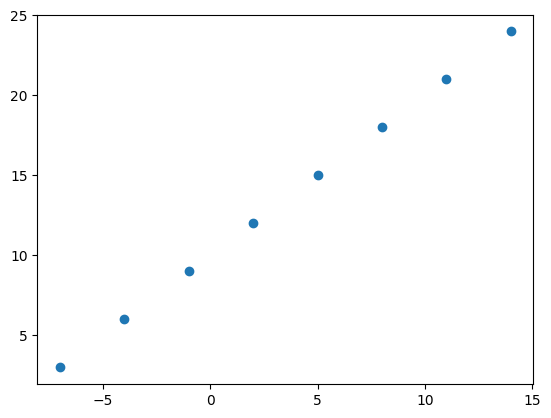

In [3]:
# Creating features

x = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(x, y);

In [4]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
x[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
x[0].ndim

0

In [9]:
# Turn our Numpy arrays into tensors with dtype 32

X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), ())

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function wich tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model)

3. Fitting a model - letting the model try to find patters between X & y (features and labels)

In [11]:
# Opetionally, the first layer can receive an 'input_shape' argument :
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# Afterwards, we do automatic shape inference :
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# ...

In [12]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient decent
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 655ms/step - loss: 19.8927 - mae: 19.8927
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 19.6114 - mae: 19.6114
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 19.3302 - mae: 19.3302
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 19.0489 - mae: 19.0489
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 18.7677 - mae: 18.7677


In [13]:
# Check our X and Y
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [14]:
# Try make prediction
model.predict([17.0])

1/1 [==============================] - 0s 112ms/step


array([[-18.628675]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - ere we might add more layers, increse the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might chang ethe optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn form)

In [15]:
# Let's rebuild our model

# 1. Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model1.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 445ms/step - loss: 8.9173 - mae: 8.9173
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 8.7848 - mae: 8.7848
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 8.6523 - mae: 8.6523
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 8.5198 - mae: 8.5198
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3873 - mae: 8.3873
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 8.2548 - mae: 8.2548
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1223 - mae: 8.1223
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9898 - mae: 7.9898
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.8573 - mae: 7.8573
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.7248 - mae: 7.7248
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [16]:
# Try make prediction
model1.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[30.178604]], dtype=float32)

In [17]:
# re-write the model by my self and improve one thing to get better

# 1. Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # chang the optimizers from SGD to adam
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model2.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 601ms/step - loss: 12.8971 - mae: 12.8971
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 12.8926 - mae: 12.8926
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 12.8881 - mae: 12.8881
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 12.8836 - mae: 12.8836
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 12.8791 - mae: 12.8791
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 12.8746 - mae: 12.8746
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 12.8701 - mae: 12.8701
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 12.8656 - mae: 12.8656
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 12.8611 - mae: 12.8611
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 12.8566 - mae: 12.8566
Epoch 11/100
1/1 [==============================

In [18]:
# Try make prediction
model2.predict([17.0])

1/1 [==============================] - 0s 189ms/step


array([[4.728125]], dtype=float32)

In [19]:
# re-write the model

# 1. Create the model (with 100 hidden units )
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model3.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.5695 - mae: 14.5695
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 13.8980 - mae: 13.8980
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 13.2342 - mae: 13.2342
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 12.5762 - mae: 12.5762
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 11.9197 - mae: 11.9197
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 11.2611 - mae: 11.2611
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 10.5968 - mae: 10.5968
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 9.9241 - mae: 9.9241
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 9.2400 - mae: 9.2400
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 8.5417 - mae: 8.5417
Epoch 11/100
1/1 [==============================] - 0s 18

In [20]:
# Try make prediction
model3.predict([17.0])

1/1 [==============================] - 0s 338ms/step


array([[27.157541]], dtype=float32)

## Evaluating Model

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

Evaluation = visualize

it's good idea to visualize :
* The data - what data we working with? what does it look like?
* The model = what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the origin label)

In [21]:
# Make a bigger dataset

x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset

y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

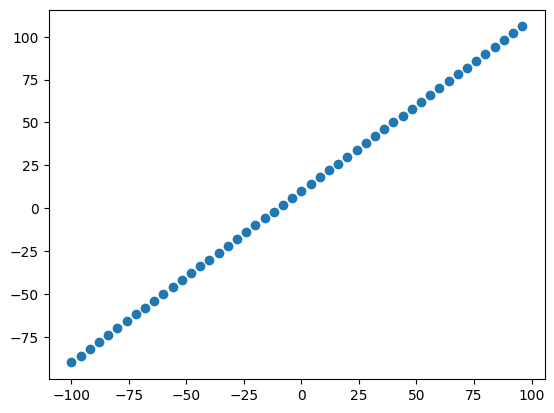

In [23]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets

* **Training set** - the model learn from this data, 70-80%
* **Validation set** - set model gets tuned on this data, 10-15%
* **Test set** - the model gets evaluated on this data, 10-15%

In [24]:
# Check the length of the data
len(x)

50

In [25]:
# Split the data into train and test sets
x_train = x[:40] # first to 40 data will be the training sample
y_train = y[:40]

x_test = x[40:] # 20% will be test
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

Now we've got out data in training and test sets...lets visualize it

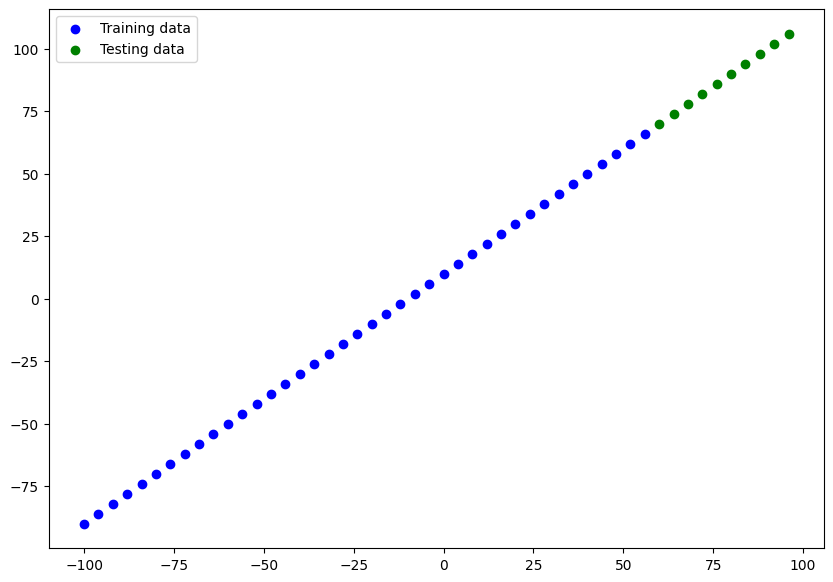

In [26]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend();

In [27]:
# Lets have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [28]:
# Lets create  model wich builds automatically by defining the input_shape arguments

tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_one")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [29]:
model.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters that we have

* Trainable parameters - the parameters (patterns) the model can update as it trains

* Non-trainable params - parameters cant updated during training (allready learn in models during **transfer learning**)

📚 **Resource** : For a more in depth overview of the trainable parameters within a layer, check ouy MIT's intorduction to deep learning video

⚡**Exercise :** Try playing around with the number of hidden units in the dense layer, see how that effect the number of parameters

In [30]:
# 3. Fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=60, verbose=0)

In [31]:
# Get a summary of our model
model.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


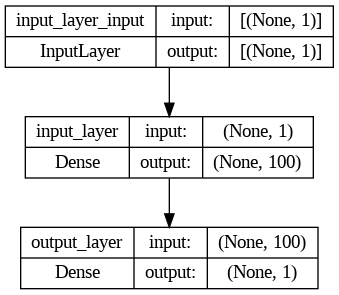

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model prediction)

In [33]:
# Make some predictions

y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 110ms/step


array([[ 71.33716 ],
       [ 76.0252  ],
       [ 80.713234],
       [ 85.40126 ],
       [ 90.08931 ],
       [ 94.77733 ],
       [ 99.46537 ],
       [104.15341 ],
       [108.841446],
       [113.529465]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note : ** if you feel like you're going to reuse some functionality in the future, its good idea to turn it into a fucntion

In [35]:
# Lets create a plotting function

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")

  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();



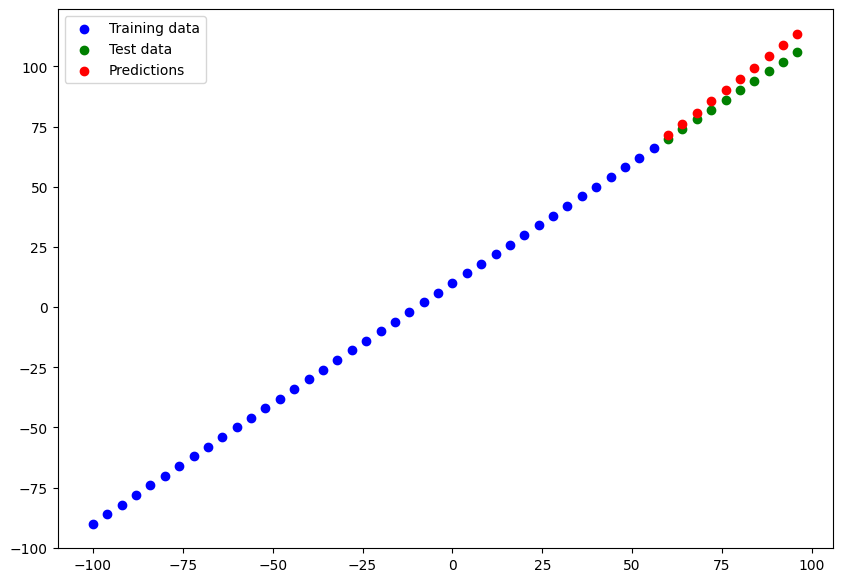

In [36]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics

The evaluation metrics is depending to the model we working on

since we're working on a regression, two of the main matrics:
* MAE - mean absolute error, "on average, how wrong is each of my model predictions"

* MSE - mean square error, "square the average errors"

In [37]:
 # Evaluate the model on the test
 model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 398ms/step - loss: 4.4333 - mae: 4.4333


[4.433320045471191, 4.433320045471191]

In [38]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.930273 , 13.58488  , 11.314707 , 10.119748 , 10.017862 ,
       11.110931 , 13.2792225, 16.52273  , 20.841446 , 25.529465 ],
      dtype=float32)>

In [39]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 71.33716 ],
       [ 76.0252  ],
       [ 80.713234],
       [ 85.40126 ],
       [ 90.08931 ],
       [ 94.77733 ],
       [ 99.46537 ],
       [104.15341 ],
       [108.841446],
       [113.529465]], dtype=float32)>

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.33716 ,  76.0252  ,  80.713234,  85.40126 ,  90.08931 ,
        94.77733 ,  99.46537 , 104.15341 , 108.841446, 113.529465],
      dtype=float32)>

In [42]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.433318>

In [45]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=23.559793>

In [46]:
# Make fucntion to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                      y_pred=y_pred)

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)